# Breast Cancer Analysis And Prediction

![](https://miro.medium.com/max/1400/1*pxFCmhRFTighUn88baLcSA.png)

Resources

1. <a href="https://www.kaggle.com/vincentlugat/breast-cancer-analysis-and-prediction#Breast-Cancer-Analysis-and-Prediction">Notebook</a>
2. <a href="https://medium.com/analytics-vidhya/breast-cancer-diagnostic-dataset-eda-fa0de80f15bd">Medium</a>


## Attribute Information:

---

* 1) ID number
* 2) Diagnosis (M = malignant, B = benign)
* 3-32)

Ten real-valued features are computed for each cell nucleus:

* a) radius (mean of distances from center to points on the perimeter)
* b) texture (standard deviation of gray-scale values)
* c) perimeter
* d) area
* e) smoothness (local variation in radius lengths)
* f) compactness (perimeter^2 / area - 1.0)
* g) concavity (severity of concave portions of the contour)
* h) concave points (number of concave portions of the contour)
* i) symmetry
* j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

# Importing Libraries

---

In [1]:
# File operation
import os
import numpy as np
import pandas as pd
import missingno as msno

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

# Modelling
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
base_dir = "../input/breast-cancer-wisconsin-data/data.csv"

In [3]:
df = pd.read_csv(base_dir)

# Understanding The Data

---

In [4]:
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

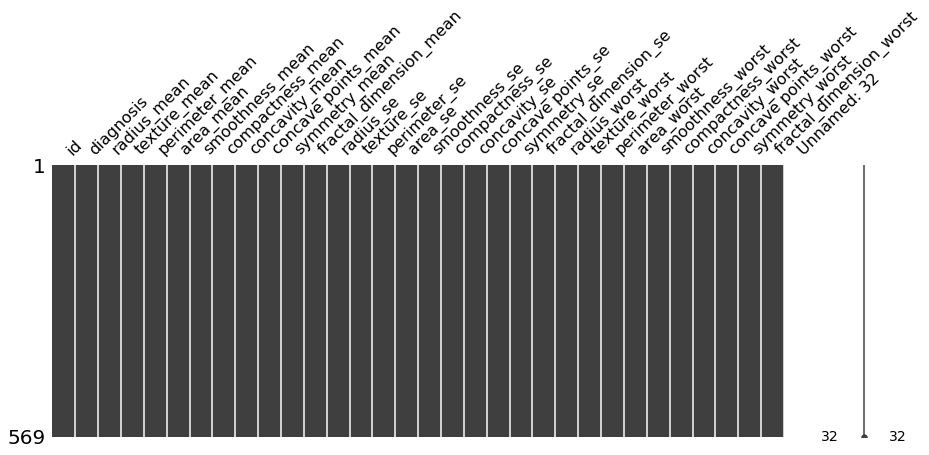

In [7]:
# Check the missing values

msno.matrix(df, figsize=(15,5));

In [8]:
# Drop unnecessary columns

df = df.drop(["id", "Unnamed: 32"], axis=1)

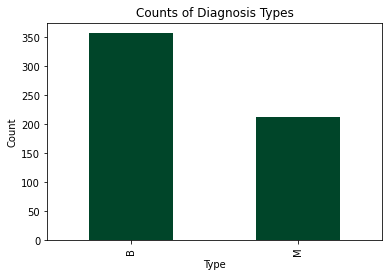

In [9]:
df.diagnosis.value_counts().plot(kind="bar", 
                                 title="Counts of Diagnosis Types", 
                                 xlabel="Type", 
                                 ylabel="Count", 
                                 colormap="YlGn_r");

In [10]:
# Splitting columns by fields for better analysis

mean_columns = df.iloc[:, 1:11]
se_columns = df.iloc[:, 11: 21]
worst_columns = df.iloc[:, 21:31]

In [11]:
mean_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


In [12]:
se_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_se,569.0,0.405172,0.277313,0.111500,0.232400,0.324200,0.478900,2.87300
texture_se,569.0,1.216853,0.551648,0.360200,0.833900,1.108000,1.474000,4.88500
perimeter_se,569.0,2.866059,2.021855,0.757000,1.606000,2.287000,3.357000,21.98000
area_se,569.0,40.337079,45.491006,6.802000,17.850000,24.530000,45.190000,542.20000
smoothness_se,569.0,0.007041,0.003003,0.001713,0.005169,0.006380,0.008146,0.03113
compactness_se,569.0,0.025478,0.017908,0.002252,0.013080,0.020450,0.032450,0.13540
concavity_se,569.0,0.031894,0.030186,0.000000,0.015090,0.025890,0.042050,0.39600
concave points_se,569.0,0.011796,0.006170,0.000000,0.007638,0.010930,0.014710,0.05279
symmetry_se,569.0,0.020542,0.008266,0.007882,0.015160,0.018730,0.023480,0.07895
fractal_dimension_se,569.0,0.003795,0.002646,0.000895,0.002248,0.003187,0.004558,0.02984


In [13]:
worst_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_worst,569.0,16.269190,4.833242,7.93000,13.01000,14.97000,18.79000,36.0400
texture_worst,569.0,25.677223,6.146258,12.02000,21.08000,25.41000,29.72000,49.5400
perimeter_worst,569.0,107.261213,33.602542,50.41000,84.11000,97.66000,125.40000,251.2000
area_worst,569.0,880.583128,569.356993,185.20000,515.30000,686.50000,1084.00000,4254.0000
smoothness_worst,569.0,0.132369,0.022832,0.07117,0.11660,0.13130,0.14600,0.2226
compactness_worst,569.0,0.254265,0.157336,0.02729,0.14720,0.21190,0.33910,1.0580
concavity_worst,569.0,0.272188,0.208624,0.00000,0.11450,0.22670,0.38290,1.2520
concave points_worst,569.0,0.114606,0.065732,0.00000,0.06493,0.09993,0.16140,0.2910
symmetry_worst,569.0,0.290076,0.061867,0.15650,0.25040,0.28220,0.31790,0.6638
fractal_dimension_worst,569.0,0.083946,0.018061,0.05504,0.07146,0.08004,0.09208,0.2075


In [14]:
fields = ["mean", "se", "worst"]
columns = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal_dimension"]

# Relationship Between Features & Diagnosis

---

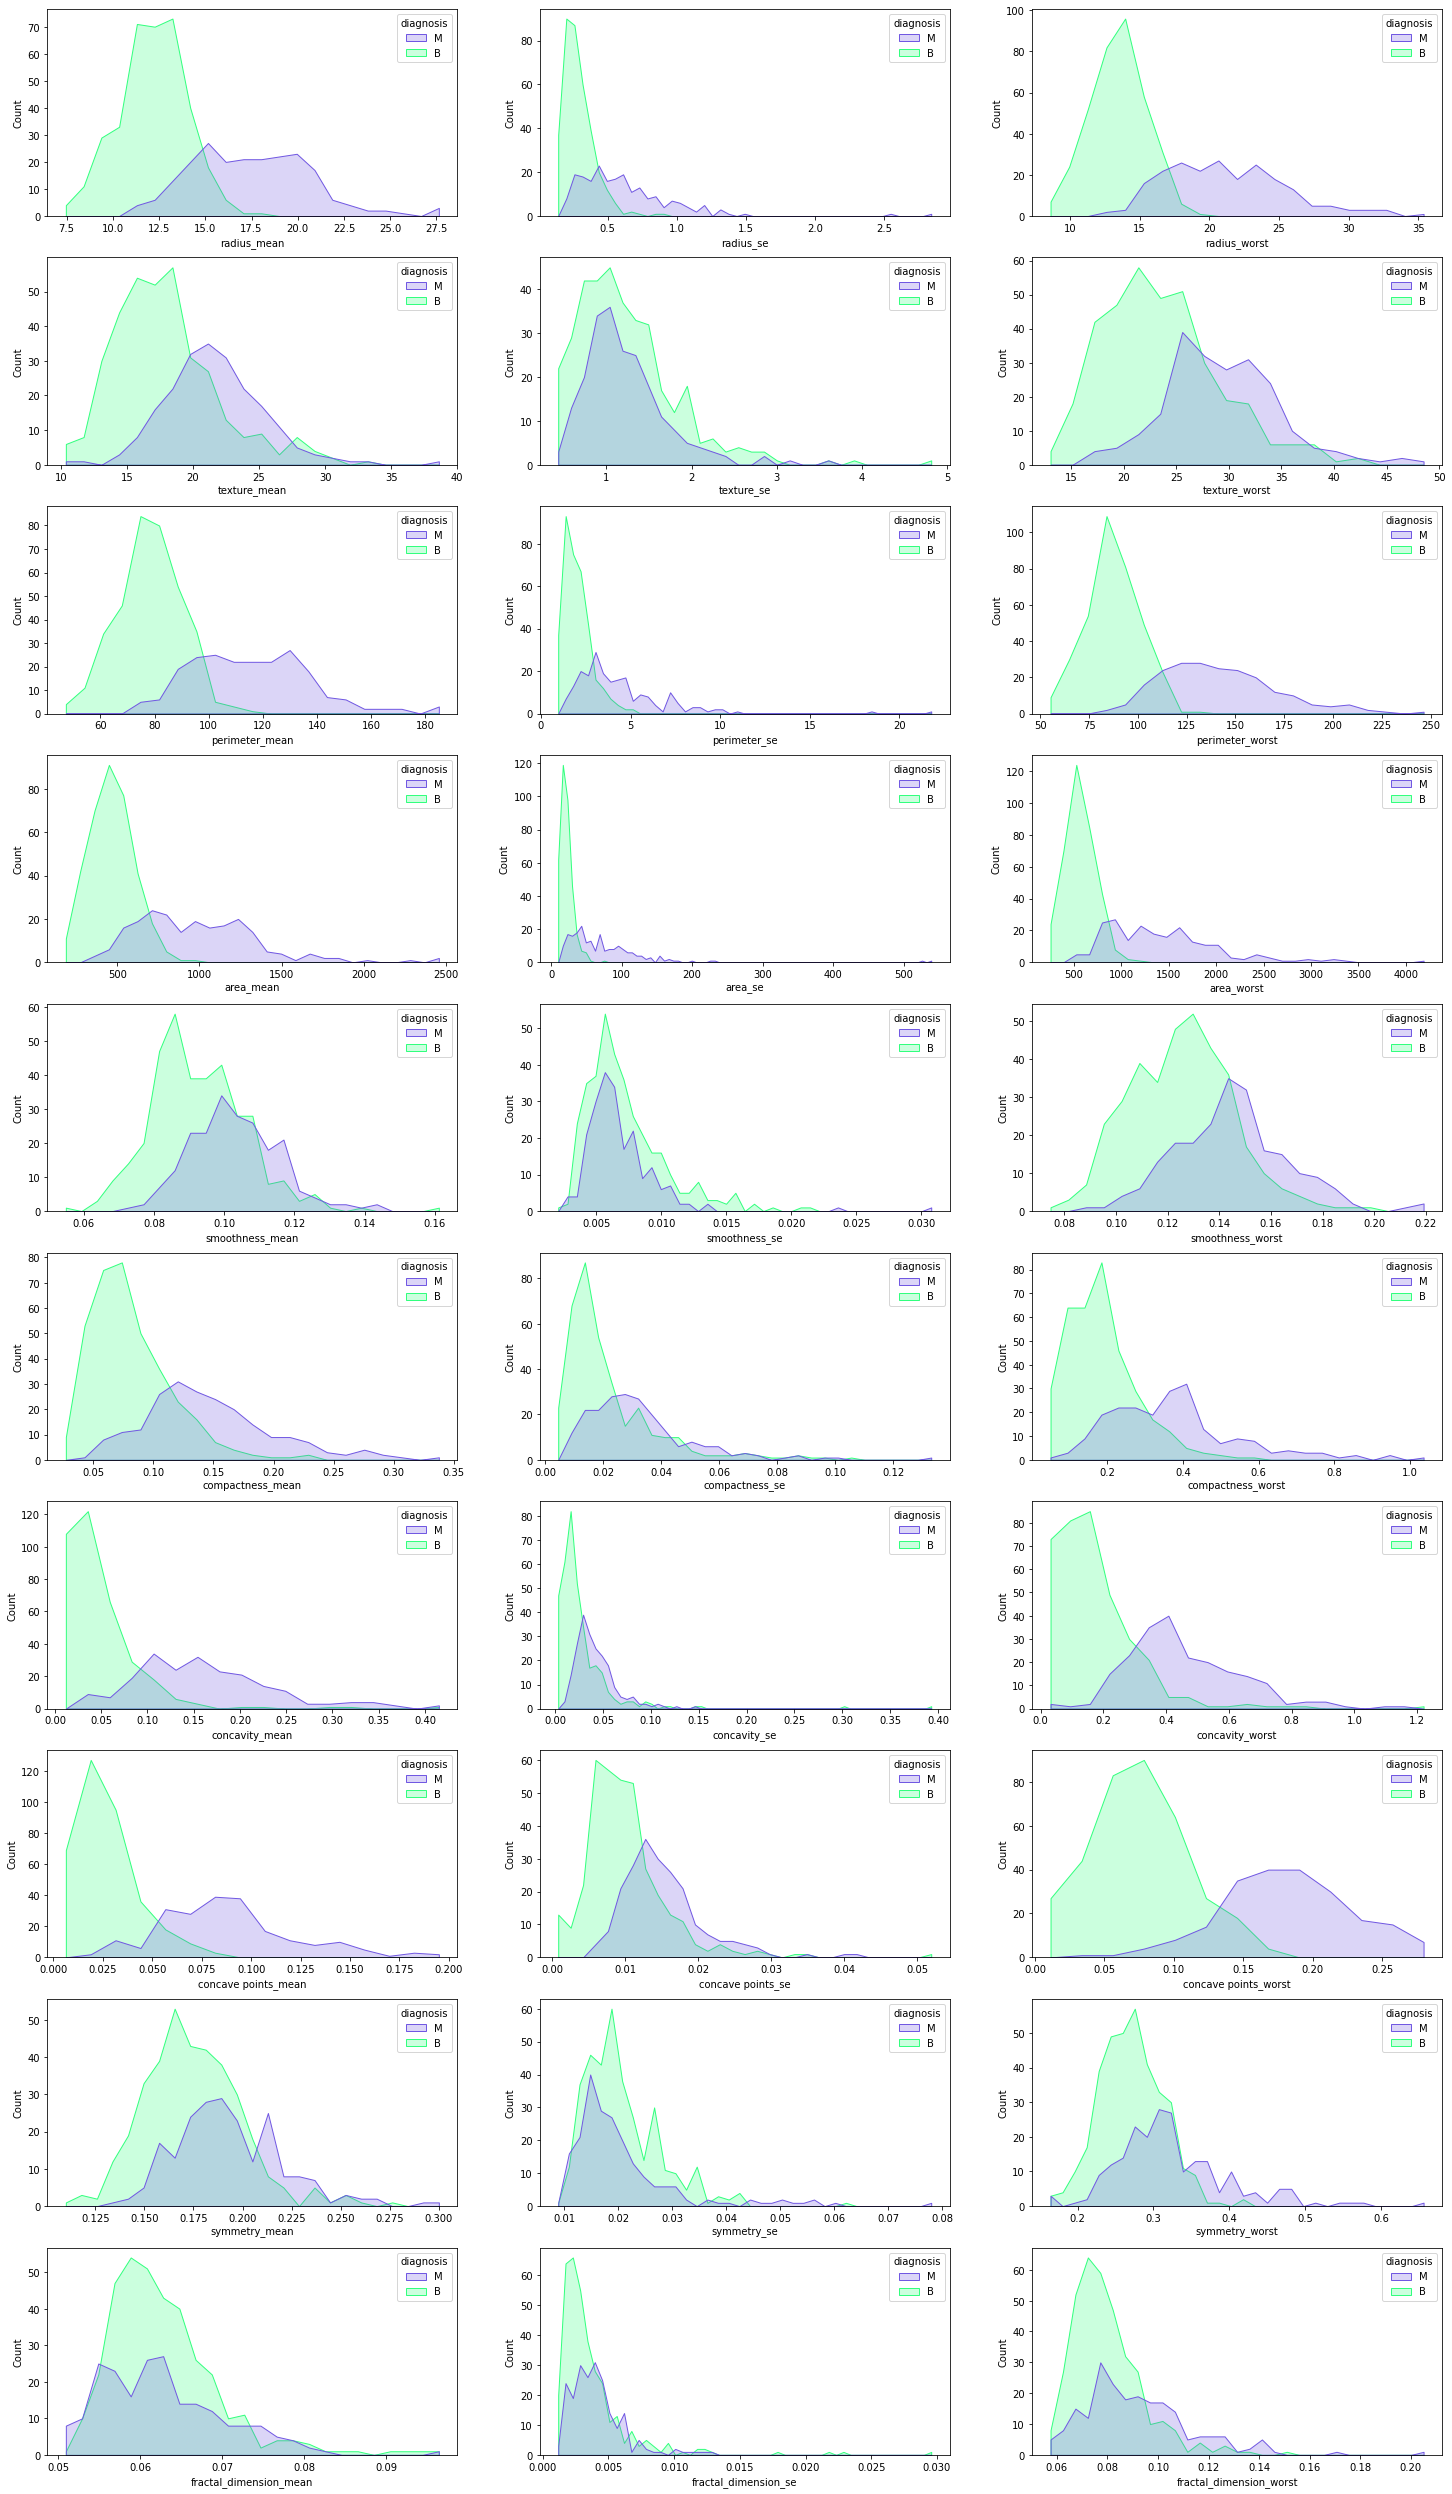

In [15]:
fig, axs = plt.subplots(10,3, figsize=(25,45))

for col in range(len(columns)):
    
    for f in range(len(fields)):
        
        sns.histplot(df, 
                     x=columns[col]+"_"+fields[f], 
                     hue="diagnosis", element="poly", 
                     stat="count", 
                     palette=["#7158e2", "#32ff7e"],
                     ax=axs[col][f])

# Relationship Between Features & Features

---

In [16]:
def heat(data, color, size):
    
    corr = data.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(corr)] = True
    
    plt.figure(figsize=size)
    sns.heatmap(corr, mask=mask, annot=True, cmap=color)
    plt.show()

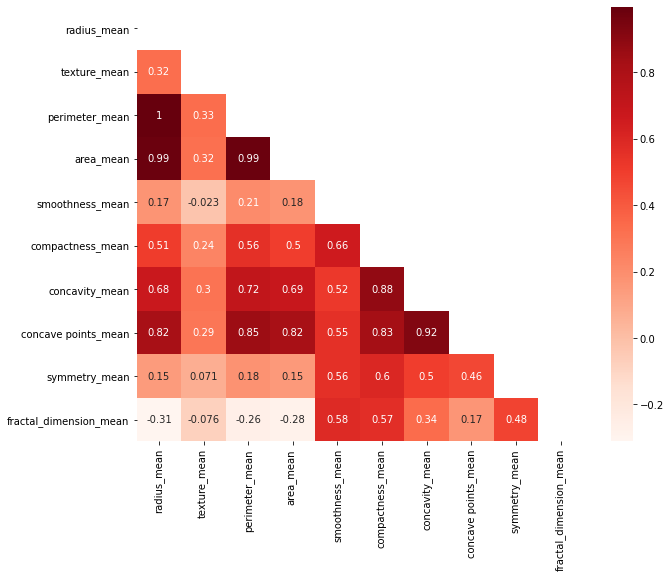

In [17]:
heat(mean_columns, "Reds", (10,8))

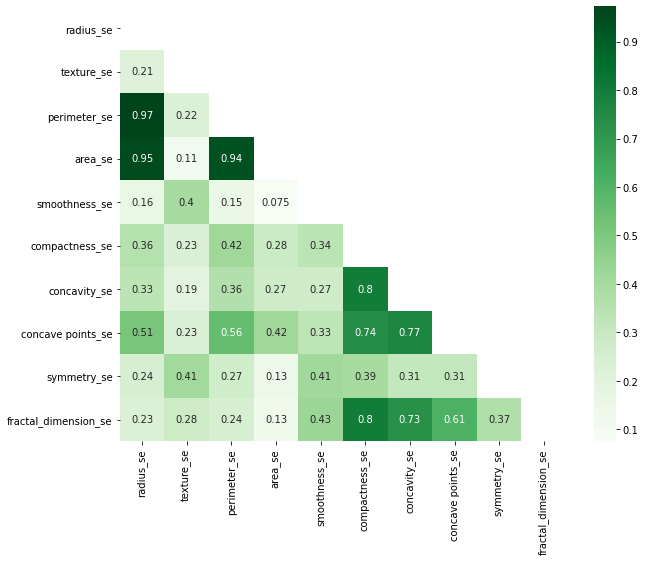

In [18]:
heat(se_columns, "Greens", (10,8))

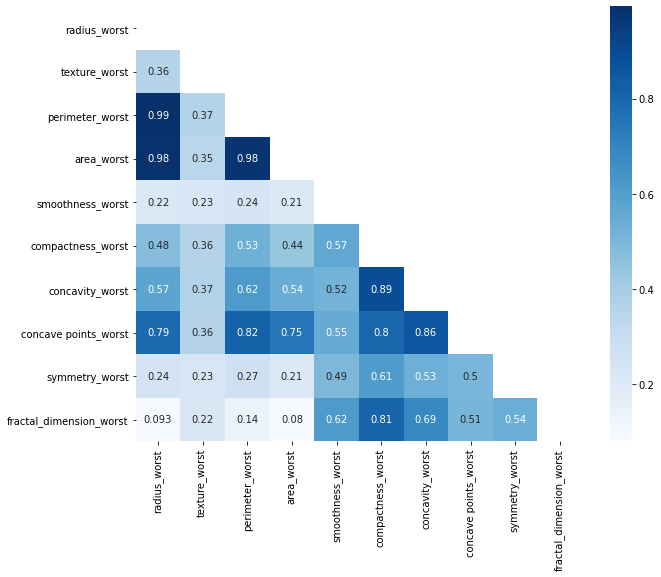

In [19]:
heat(worst_columns, "Blues", (10,8))

### With heatmaps, we can see correlation between this columns:
---

* *perimeter - radius*
* *area - radius*
* *area - perimeter*
* *concavity - compactness*
* *fractal_dimension - compactness*
* *concave points - compactness*
* *concave points - concavity*
* *concave points - radius*
* *concave points - perimeter*
* *concave points - area*

In [20]:
def scatter_columns(feature1, feature2, title):
    
    fig = go.Figure()
    fig.update_layout(
        title=title,
        width=600,
        height=400,
        margin=dict(
                    l=20,
                    r=20,
                    t=40,
                    b=20,
                )
    )
    
    fig.add_trace(go.Scatter(x=df[feature1+"_"+fields[0]], 
                             y=df[feature2+"_"+fields[0]], 
                             mode="markers", 
                             name="mean",
                             ))

    fig.add_trace(go.Scatter(x=df[feature1+"_"+fields[1]], 
                             y=df[feature2+"_"+fields[1]], 
                             mode="markers", 
                             name="se",
                             ))

    fig.add_trace(go.Scatter(x=df[feature1+"_"+fields[2]], 
                             y=df[feature2+"_"+fields[2]], 
                             mode="markers", 
                             name="worst",
                             ))
    fig.show()

In [21]:
scatter_columns("perimeter", "radius", "Perimeter & Radius")

In [22]:
scatter_columns("area", "radius", "Area & Radius")

In [23]:
scatter_columns("area", "perimeter", "Area & Perimeter")

In [24]:
scatter_columns("concavity", "compactness", "Concavity & Compactless")

In [25]:
scatter_columns("fractal_dimension", "compactness", "Fractal Dimension & Compactness")

In [26]:
cols = ["radius", "perimeter", "area", "compactness", "concavity"]

fig = make_subplots(rows=5, cols=1, 
                    subplot_titles=[ "Radius & Concave Points",
                                     "Perimeter & Concave Points",
                                     "Area & Concave Points",
                                     "Compactness & Concave Points",
                                     "Concavity & Concave Points",
                                    ])
    
for i in range(len(cols)):
    
    fig.update_layout(
    width=900,
    height=1600,
    margin=dict(
                l=40,
                r=40,
                t=30,
                b=0,
            )
    )
    
    fig.update_xaxes(title_text=cols[i], row=i+1, col=1)
    fig.update_yaxes(title_text="concave points", row=i+1, col=1)
    
    fig.add_trace(go.Scatter(x=df[cols[i]+"_"+fields[0]],
                             y=df["concave points"+"_"+fields[0]], 
                             mode="markers", 
                             name="mean",
                             ),
                  row=i+1,
                  col=1,
                 )

    fig.add_trace(go.Scatter(x=df[cols[i]+"_"+fields[1]], 
                             y=df["concave points"+"_"+fields[1]], 
                             mode="markers", 
                             name="se",
                             ),
                 
                  row=i+1,
                  col=1,
                 )

    fig.add_trace(go.Scatter(x=df[cols[i]+"_"+fields[2]], 
                             y=df["concave points"+"_"+fields[2]], 
                             mode="markers", 
                             name="worst",
                            ),
                 
                  row=i+1,
                  col=1,
                 )
                             
fig.show()

# Preprocessing

---

In [27]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### From Outliers to Mean

---

*We can transform outlier to the mean of each column for better modeling*

In [28]:
for col in range(len(columns)):
    
    for f in range(len(fields)):
        
        Q1 = df[columns[col]+"_"+fields[f]].quantile(0.25)
        Q3 = df[columns[col]+"_"+fields[f]].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        outliers = (df[columns[col]+"_"+fields[f]] < lower_bound) | (df[columns[col]+"_"+fields[f]] > upper_bound)
        df[columns[col]+"_"+fields[f]][outliers] = df[columns[col]+"_"+fields[f]].mean()

### Split The Data

---

In [29]:
x = df.drop("diagnosis", axis=1)   # our feautures
y = df.diagnosis                   # our label

In [30]:
# For Diagnosis column, we have to transform benign-malign to 0-1 for better modeling

y = pd.get_dummies(y)
y = y.drop("B", axis=1)  # we dropping the "B" column because we dont need it. If a label is Benign, then "M" column will be 0.

In [31]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.104341,0.088799,0.14710,0.241900,0.078710,...,25.38,17.33,184.60,880.583128,0.162200,0.254265,0.7119,0.2654,0.290076,0.118900
1,20.57,17.77,132.90,1326.0,0.08474,0.078640,0.086900,0.07017,0.181200,0.056670,...,24.99,23.41,158.80,880.583128,0.123800,0.186600,0.2416,0.1860,0.275000,0.089020
2,19.69,21.25,130.00,1203.0,0.10960,0.159900,0.197400,0.12790,0.206900,0.059990,...,23.57,25.53,152.50,1709.000000,0.144400,0.424500,0.4504,0.2430,0.361300,0.087580
3,11.42,20.38,77.58,386.1,0.09636,0.104341,0.241400,0.10520,0.181162,0.062798,...,14.91,26.50,98.87,567.700000,0.132369,0.254265,0.6869,0.2575,0.290076,0.083946
4,20.29,14.34,135.10,1297.0,0.10030,0.132800,0.198000,0.10430,0.180900,0.058830,...,22.54,16.67,152.20,1575.000000,0.137400,0.205000,0.4000,0.1625,0.236400,0.076780


In [32]:
y.head()

,M
0,1
1,1
2,1
3,1
4,1


### Standard Scaler

---

> Standardize features by removing the mean and scaling to unit variance

In [33]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

### Train-Test Split

---

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
print(f"x_train: {x_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

x_train: (455, 30)
x_test: (114, 30)
y_train: (455, 1)
y_test: (114, 1)


In [36]:
x_train

array([[-1.56390447e+00, -4.47485463e-01, -1.47263454e+00, ...,
         9.19591724e-01,  1.64785717e-01,  2.62350642e+00],
       [ 2.33110509e+00,  1.86249044e+00,  2.45202983e+00, ...,
         2.67521840e+00,  2.73468370e+00,  1.64944406e-01],
       [-1.51740074e+00, -1.31497641e+00, -1.45345789e+00, ...,
        -9.70485810e-01,  9.83130758e-01,  2.34858716e-01],
       ...,
       [ 1.35096053e-01, -5.74984133e-01,  1.16088753e-03, ...,
        -1.23756033e+00, -7.85594269e-01, -1.50167351e+00],
       [ 3.49838767e-02,  1.25008564e-01,  3.95141801e-02, ...,
         1.03683652e+00,  7.62040130e-01,  1.74424960e+00],
       [-5.46312632e-01,  3.50006217e-01, -6.10620902e-01, ...,
        -6.13574367e-01, -2.79017683e-01, -9.46276283e-01]])

# Modeling

---

In [37]:
!pip install lightgbm
!pip install xgboost

In [38]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [39]:
algorithms = [LogisticRegression, 
              RidgeClassifier, 
              SVC, 
              LinearSVC, 
              RandomForestClassifier,
              KNeighborsClassifier,
              GaussianNB, 
              Perceptron, 
              SGDClassifier, 
              DecisionTreeClassifier,
              AdaBoostClassifier,
              GradientBoostingClassifier,
              LGBMClassifier,
              XGBClassifier,
             ]

In [40]:
df_algorithms = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy"])

In [41]:
def autoML(algorithm): 

    model = algorithm().fit(x_train, y_train)
    train_acc = model.score(x_train, y_train)
    model_name = algorithm.__name__
    
    y_pred = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    return model_name, train_acc, test_acc

In [42]:
for alg in algorithms:
    
    model_name, train_acc, test_acc = autoML(alg)
    
    df_algorithms = df_algorithms.append({"Model" : model_name,
                                          "Train Accuracy": train_acc,
                                          "Test Accuracy": test_acc}, ignore_index=True)

[14:19:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
df_algorithms.sort_values(by=["Test Accuracy", "Train Accuracy"],ascending=False)

,Model,Train Accuracy,Test Accuracy
3,LinearSVC,0.975824,0.982456
0,LogisticRegression,0.971429,0.982456
1,RidgeClassifier,0.967033,0.982456
6,GaussianNB,0.923077,0.982456
4,RandomForestClassifier,1.000000,0.973684
10,AdaBoostClassifier,1.000000,0.964912
11,GradientBoostingClassifier,1.000000,0.964912
12,LGBMClassifier,1.000000,0.964912
13,XGBClassifier,1.000000,0.964912
2,SVC,0.989011,0.964912


# Tuning

---

In [44]:
model = LinearSVC()

In [45]:
parameters = {"penalty": ["l1","l2"],
              "loss": ["hinge", "squared_hinge"], 
              "C": [0.001, 0.01, 0.1, 1, 10],
              "multi_class": ["ovr", "crammer_singer"], 
              }

In [46]:
cv_model = GridSearchCV(model, 
                        parameters, 
                        cv=5, 
                        n_jobs=-1

                       ).fit(x_train, y_train)

In [47]:
cv_model.best_params_

{'C': 0.01, 'loss': 'hinge', 'multi_class': 'crammer_singer', 'penalty': 'l1'}

In [48]:
tuned_model = LinearSVC(C = 0.01, 
                        loss = "hinge",
                        multi_class = "crammer_singer", 
                        penalty = "l1"

                        ).fit(x_train, y_train)

In [49]:
y_pred = tuned_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9824561403508771

In [50]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



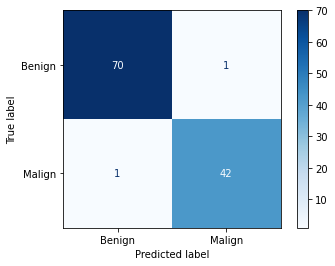

In [51]:
plot_confusion_matrix(tuned_model,
                      x_test,
                      y_test,
                      display_labels=["Benign", "Malign"],
                      cmap=plt.cm.Blues,
                     )

### Thanks for reading! Hope this notebook helped